In [1]:
#Import lirairies...

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
from shapely.geometry import Point
import plotly.express as px

In [2]:
# Importing DATAFRAME Chipotle_stores
df = pd.read_csv('./assets/chipotle_stores.csv', sep=',')
df

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220
...,...,...,...,...,...
2624,Wisconsin,Pleasant Prairie,"9370 76th St # B Pleasant Prairie, WI 53158 US",42.565892,-87.921048
2625,Wisconsin,Wauwatosa,"2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US",43.067723,-88.048222
2626,North Dakota,Fargo,"1204 19th Ave N Fargo, ND 58102 US",46.904247,-96.796618
2627,North Dakota,Fargo,"1680 45th St S Fargo, ND 58103 US",46.855337,-96.861416


In [3]:
# Importing US STATES MAP for GEOPANDAS
states = gp.read_file('data/usa-states-census-2014.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

In [4]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


In [6]:
states = states.to_crs("EPSG:3395")

In [7]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,MULTIPOLYGON Z (((-13201820.240 3933920.113 0....
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-8584932.302 4685414.972 0.000, -8..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-9529523.377 4137300.133 0.000, -9..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-13051434.065 5496245.142 0.000, -..."


## Vizualisation

Let's plots the map with geopandas !

<AxesSubplot:>

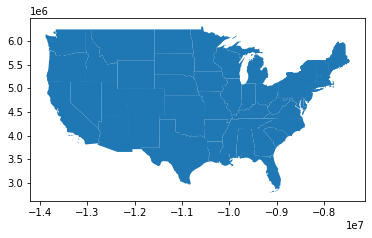

In [8]:
states.plot()

<AxesSubplot:>

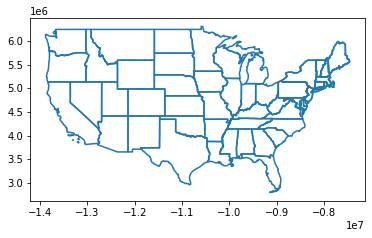

In [9]:
states.boundary.plot()

### Here are some cmap codes you can play around with.

viridis, plasma, inferno, magma, cividis
Greys, Purples, Blues, Greens, Oranges, Reds
YlOrBr, OrRd, PuRd, RdPu, BuPu, GnBu, PuBu, YlGnBu, PuBuGn, BuGn, YlGn
PiYg, PRGn, BrBG, PuOr, RdGy, RdBu, RdYlBu, Spectral, coolwarm, bwr, seismic
twilight, twilight_shifted, hsv
Pastel1, Pastel2, PAired, Accent, Dark2, Set1, Set2, Set3, tab10, tab20, tab20b, tab20c

<AxesSubplot:>

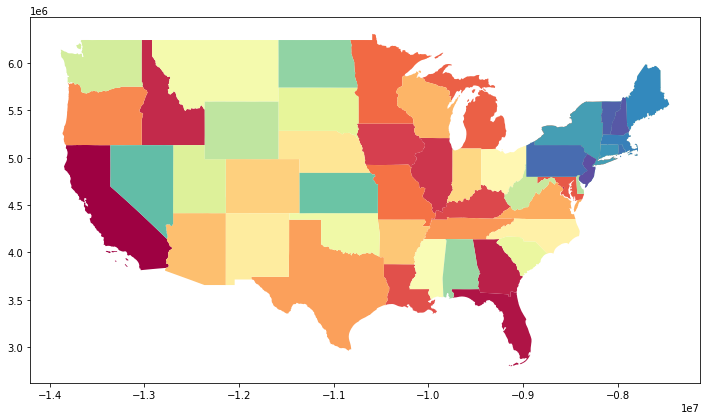

In [10]:
states.plot(cmap='Spectral', figsize=(12, 12))

In [11]:
# states['NAME']

In [12]:
states[states['NAME'] == 'California']

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,MULTIPOLYGON Z (((-13201820.240 3933920.113 0....


### Plotting only one state

<AxesSubplot:>

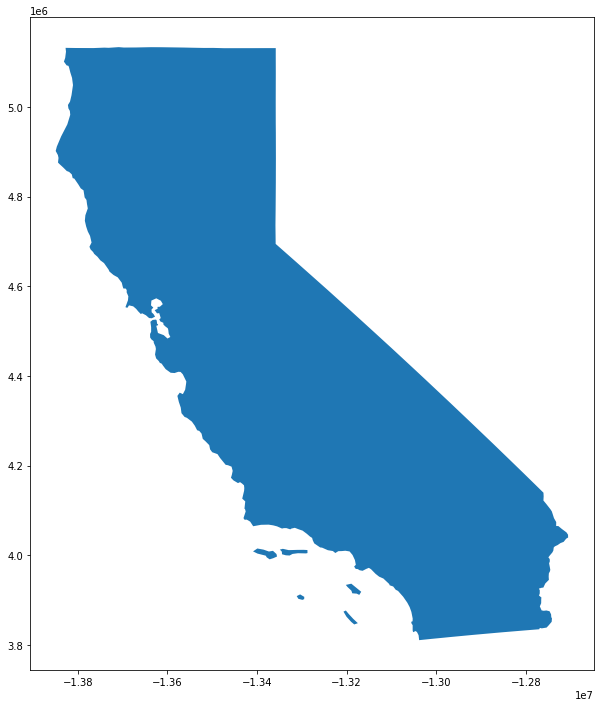

In [13]:
states[states['NAME'] == 'California'].plot(figsize=(12, 12))

<AxesSubplot:>

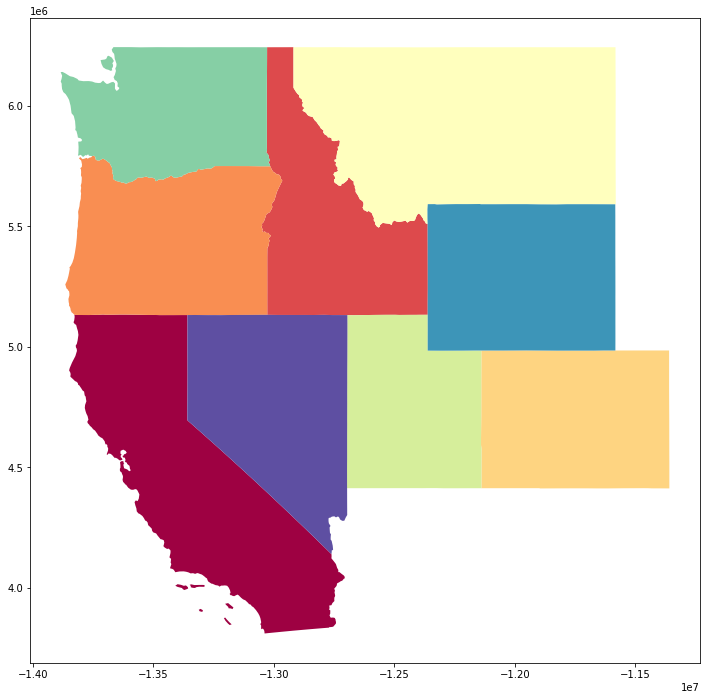

In [14]:
west = states[states['region'] == 'West']
west.plot(cmap='Spectral', figsize=(12, 12))

### Plotting with label

<ipython-input-15-050ad94ce5cf>:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  west.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);


Text(-0.05, 0.5, 'label')

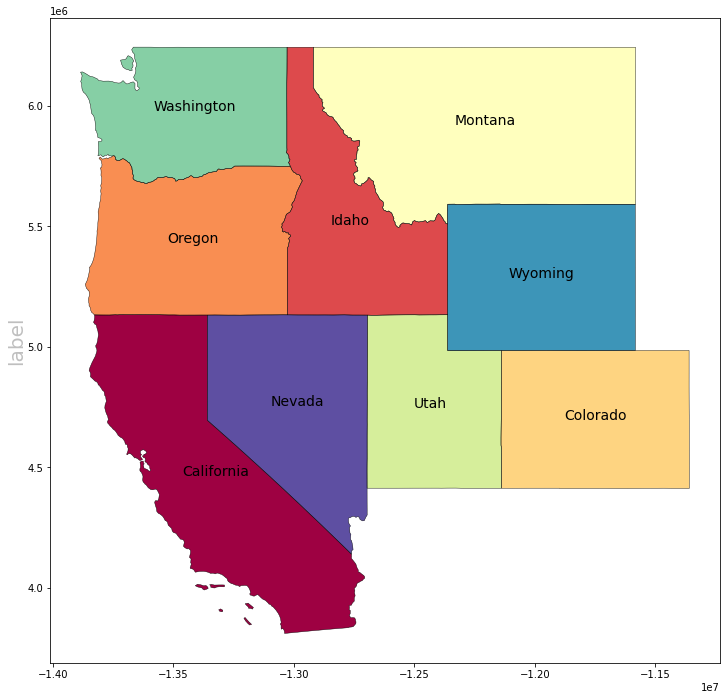

In [15]:
fig = plt.figure(1, figsize=(12,15)) 
ax = fig.add_subplot()
west.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
west.boundary.plot(ax=ax, color='Black', linewidth=.4)
west.plot(ax=ax, cmap='Spectral', figsize=(12, 12))
ax.text(-0.05, 0.5, 'label', transform=ax.transAxes,
        fontsize=20, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

### Multi-map

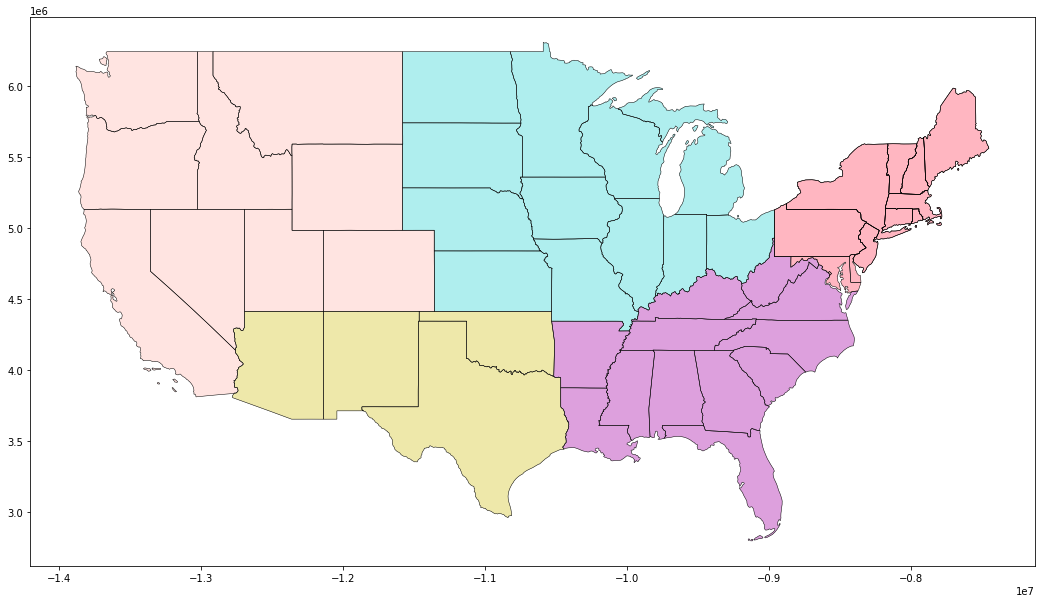

In [16]:
west = states[states['region'] == 'West']
southwest = states[states['region'] == 'Southwest']
southeast = states[states['region'] == 'Southeast']
midwest = states[states['region'] == 'Midwest']
northeast = states[states['region'] == 'Northeast']
us_boundary_map = states.boundary.plot(figsize=(18, 12), color='Black', linewidth=.5)
west.plot(ax=us_boundary_map,  color="MistyRose")
southwest.plot(ax=us_boundary_map, color="PaleGoldenRod")
southeast.plot(ax=us_boundary_map, color="Plum")
midwest.plot(ax=us_boundary_map, color="PaleTurquoise")
final_map = northeast.plot(ax=us_boundary_map, color="LightPink")

### Changing crs from epsg=2163 to mercator (epsg=3395)

In [17]:
# def to_merc(x):
#     p = gp.GeoSeries([Point(x.longitude, x.latitude)])
#     p.crs = 'epsg:2163'
#     return p.to_crs(epsg=3395)

# df['coor'] = df.apply(to_merc, axis=1)

In [18]:
# df.to_csv("./assets/chipotle_stores_points.csv")

In [19]:
df = pd.read_csv('./assets/chipotle_stores_points.csv', sep=',', index_col = 0)
df

,state,location,address,latitude,longitude,coor
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,POINT (-11132070.11277604 5591341.927497856)
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756,POINT (-11132071.97518301 5591343.201522727)
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437,POINT (-11132071.75528336 5591343.322678444)
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279,POINT (-11132071.8272633 5591343.078566663)
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220,POINT (-11132072.02965358 5591344.110820671)
...,...,...,...,...,...,...
2624,Wisconsin,Pleasant Prairie,"9370 76th St # B Pleasant Prairie, WI 53158 US",42.565892,-87.921048,POINT (-11132073.55864461 5591355.980229197)
2625,Wisconsin,Wauwatosa,"2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US",43.067723,-88.048222,POINT (-11132073.73870926 5591356.68833751)
2626,North Dakota,Fargo,"1204 19th Ave N Fargo, ND 58102 US",46.904247,-96.796619,POINT (-11132086.12484133 5591362.101699436)
2627,North Dakota,Fargo,"1680 45th St S Fargo, ND 58103 US",46.855337,-96.861416,POINT (-11132086.21658086 5591362.03268343)


In [20]:
df.loc[0].coor.split(" ")[1].replace("(", "")

'-11132070.11277604'

In [21]:
df['longitude'] = df['coor'].apply(lambda x : float(x.split(" ")[1].replace("(", "")))
df['latitude'] = df['coor'].apply(lambda x : float(x.split(" ")[2].replace(")", "")))
df

,state,location,address,latitude,longitude,coor
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",5.591342e+06,-1.113207e+07,POINT (-11132070.11277604 5591341.927497856)
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",5.591343e+06,-1.113207e+07,POINT (-11132071.97518301 5591343.201522727)
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",5.591343e+06,-1.113207e+07,POINT (-11132071.75528336 5591343.322678444)
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",5.591343e+06,-1.113207e+07,POINT (-11132071.8272633 5591343.078566663)
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",5.591344e+06,-1.113207e+07,POINT (-11132072.02965358 5591344.110820671)
...,...,...,...,...,...,...
2624,Wisconsin,Pleasant Prairie,"9370 76th St # B Pleasant Prairie, WI 53158 US",5.591356e+06,-1.113207e+07,POINT (-11132073.55864461 5591355.980229197)
2625,Wisconsin,Wauwatosa,"2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US",5.591357e+06,-1.113207e+07,POINT (-11132073.73870926 5591356.68833751)
2626,North Dakota,Fargo,"1204 19th Ave N Fargo, ND 58102 US",5.591362e+06,-1.113209e+07,POINT (-11132086.12484133 5591362.101699436)
2627,North Dakota,Fargo,"1680 45th St S Fargo, ND 58103 US",5.591362e+06,-1.113209e+07,POINT (-11132086.21658086 5591362.03268343)


### Showing the repartition

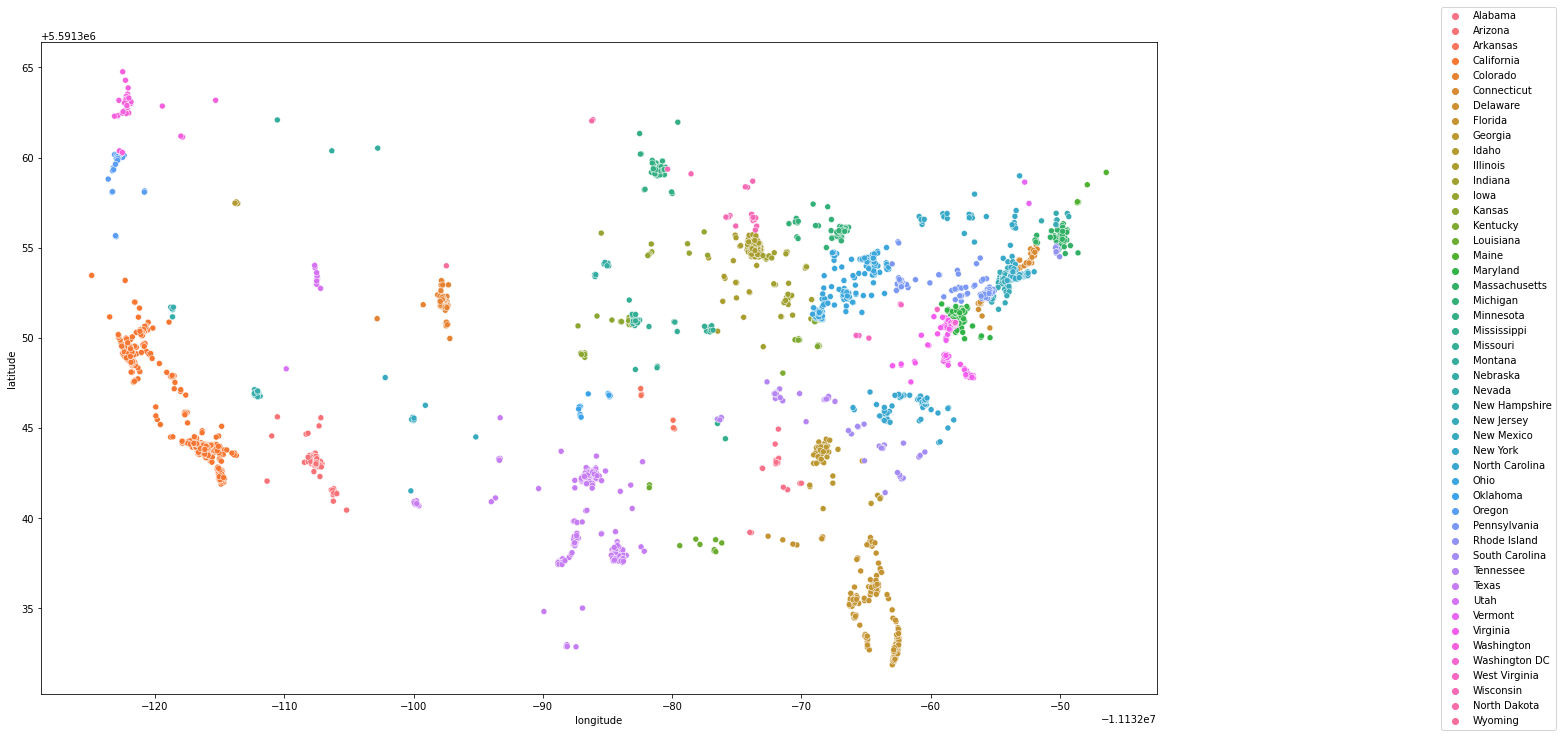

In [22]:
plt.figure(figsize=(20,12))
g = sns.scatterplot(x='longitude', y='latitude', data=df, hue='state')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)